In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ttl_path =r'events/NI-DAQmx-106.PXIe-6341/TTL'

#os.chdir(ttl_path)

In [33]:
#exploring data structure
timestamps = np.load('timestamps.npy')
channel_states = np.load("states.npy")

# If channel_states is an integer (bit mask), split into individual channels
num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

# Create DataFrame with timestamps and channel states
all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
print(all_events_df.sum()) #-print(all_events_df.sum()) #-count instances of each ch
all_events_df.insert(0, 'timestam', timestamps)
    
print(all_events_df)

channel_0    6176521
channel_1    3088260
channel_2    3100614
dtype: int64
           timestam  channel_0  channel_1  channel_2
0         -1.000000          0          0          1
1         -1.000000          1          0          0
2         -1.000000          1          1          1
3         -1.000000          1          0          0
4         -1.000000          1          1          1
...             ...        ...        ...        ...
6188870  610.022349          1          0          0
6188871  610.022449          1          1          1
6188872  610.022549          1          0          0
6188873  610.022649          1          1          1
6188874  610.022749          1          0          0

[6188875 rows x 4 columns]


In [ ]:
The working hypothesis is that channel_0 is the trigger channel, which I explore below.

In [34]:
#exploring data structure- parse to only include trigger instances
print(all_events_df[all_events_df["channel_0"]==1])

           timestam  channel_0  channel_1  channel_2
1         -1.000000          1          0          0
2         -1.000000          1          1          1
3         -1.000000          1          0          0
4         -1.000000          1          1          1
5         -1.000000          1          0          0
...             ...        ...        ...        ...
6188870  610.022349          1          0          0
6188871  610.022449          1          1          1
6188872  610.022549          1          0          0
6188873  610.022649          1          1          1
6188874  610.022749          1          0          0

[6176521 rows x 4 columns]


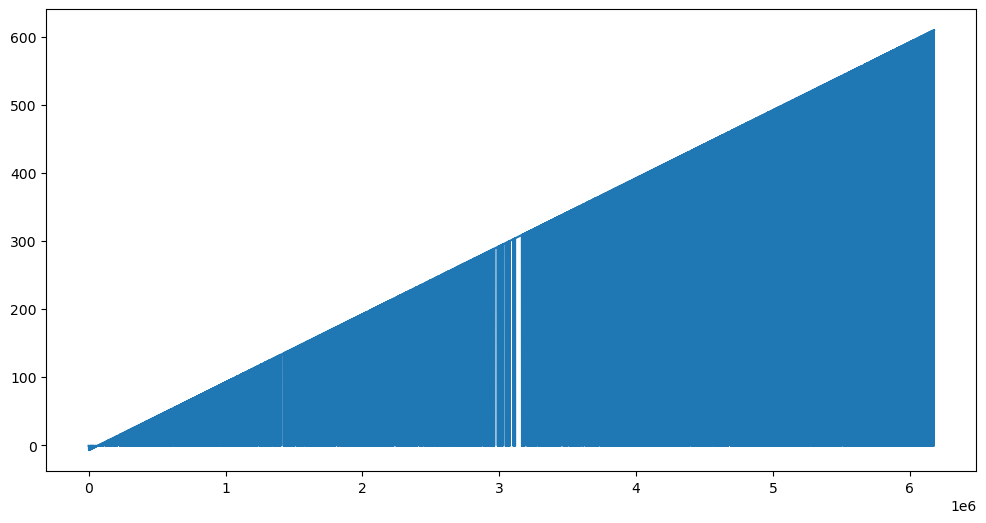

In [55]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(timestamps[all_events_df["channel_0"]==1])

In [38]:
def extract_ttl_events(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    
    
    # Extract TTL events where the state changes
    events_df = pd.DataFrame({
        'timestamp': timestamps,
        'state': channel_states
    })
    
    # Only consider state changes (e.g., rising edge for stimulus onset)
    ttl_onsets = events_df[events_df['state'] == 1].reset_index(drop=True)
    
    return ttl_onsets

extract_ttl_events(ttl_path)

Events files do not exist: events/NI-DAQmx-106.PXIe-6341/TTL/timestamps.npy or events/NI-DAQmx-106.PXIe-6341/TTL/states.npy


In [22]:
def extract_ttl_events_all_channels(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    print(set(channel_states)) #the unique values of channels

    # If channel_states is an integer (bit mask), split into individual channels
    num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
    channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

    # Create DataFrame with timestamps and channel states
    all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
    print(all_events_df.sum())
    all_events_df.insert(0, 'timestam', timestamps)
    
    return all_events_df
    

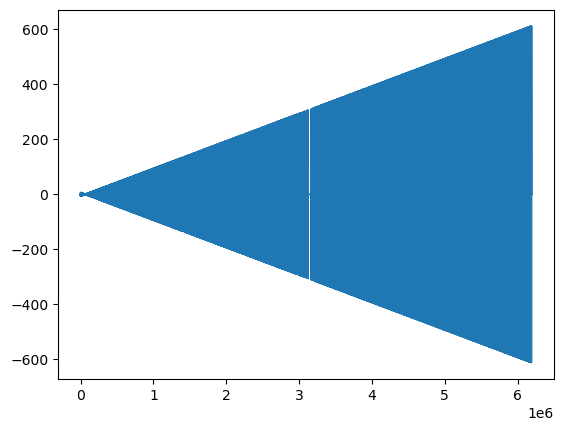

In [36]:
import matplotlib.pyplot as plt
timestamps_file_path = os.path.join("timestamps.npy")
timestamps = np.load(timestamps_file_path)
plt.plot(np.diff(timestamps))#[0:15000])

In [5]:
pwd

'/Users/brianacarroll/Downloads/forGit/events/NI-DAQmx-106.PXIe-6341/TTL'

In [6]:
extract_ttl_events_all_channels(ttl_path)

Events files do not exist: events/NI-DAQmx-106.PXIe-6341/TTL/timestamps.npy or events/NI-DAQmx-106.PXIe-6341/TTL/states.npy


In [55]:
import matplotlib.pyplot as plt

def extract_and_plot_ttl_events(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    

    # If channel_states is an integer (bit mask), split into individual channels
    num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
    channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

    # Create DataFrame with timestamps and channel states
    all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
    all_events_df.insert(0, 'timestamp', timestamps)

    # Limit to the first 20 timestamps
    X=100
    limited_events_df = all_events_df.iloc[:X]

    # Plot each channel's state over time
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    for i =in range(num_channels):
        plt.plot(
            limited_events_df['timestamp'], 
            limited_events_df[f'channel_{i}'], 
            label=f'Channel {i}'
        )
    
    # Customize plot
    plt.xlabel("Time (seconds)")
    plt.ylabel("State (0 or 1)")
    plt.title("TTL States Over Time (First X Timestamps)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return limited_events_df

extract_and_plot_ttl_events(ttl_path)

SyntaxError: invalid syntax (747596504.py, line 29)

[-4 -7  7 ... -7  7 -7]


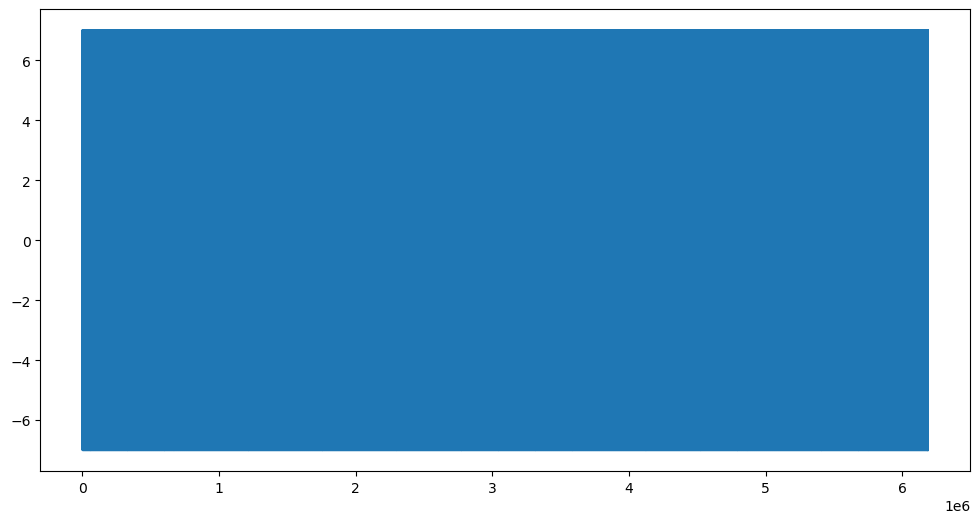

In [57]:
timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
channel_states_file_path = os.path.join(ttl_path, "states.npy")

timestamps = np.load(timestamps_file_path)
channel_states = np.load(channel_states_file_path)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(channel_states)
print(channel_states)